<a href="https://colab.research.google.com/github/phornpailinn/dads./blob/main/ML_6610412006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [39]:
df = "https://raw.githubusercontent.com/phornpailinn/dads./main/Housing.csv"
df =pd.read_csv(df,sep =",")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


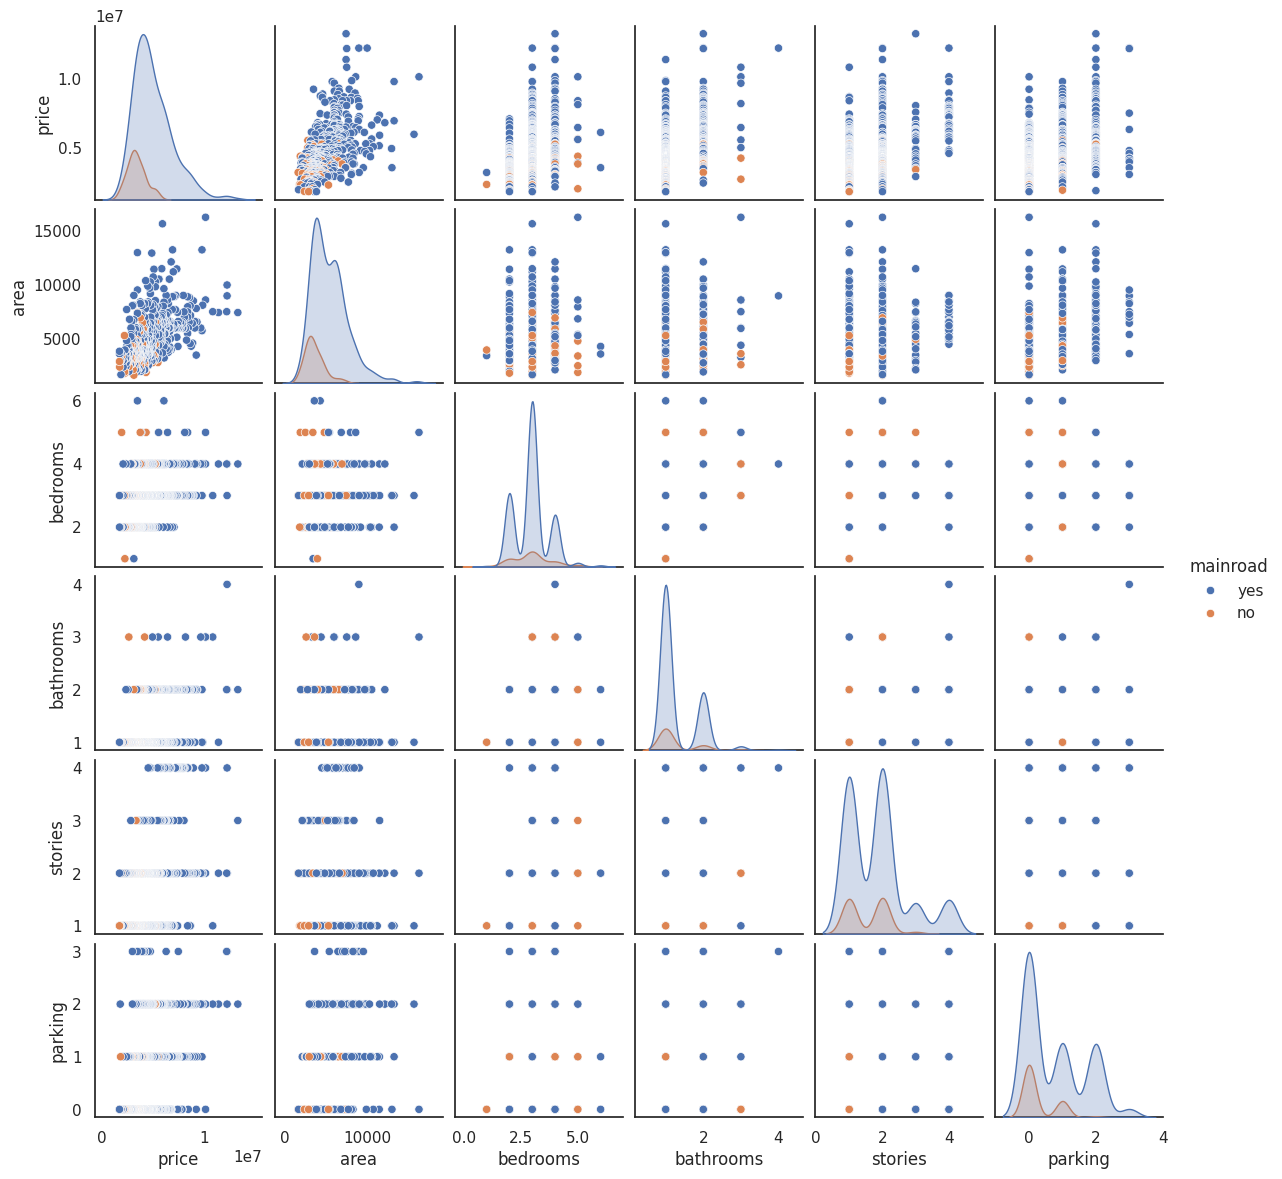

In [56]:
sns.pairplot(df,hue='mainroad', height=2)

<ipython-input-57-082c6a665be5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


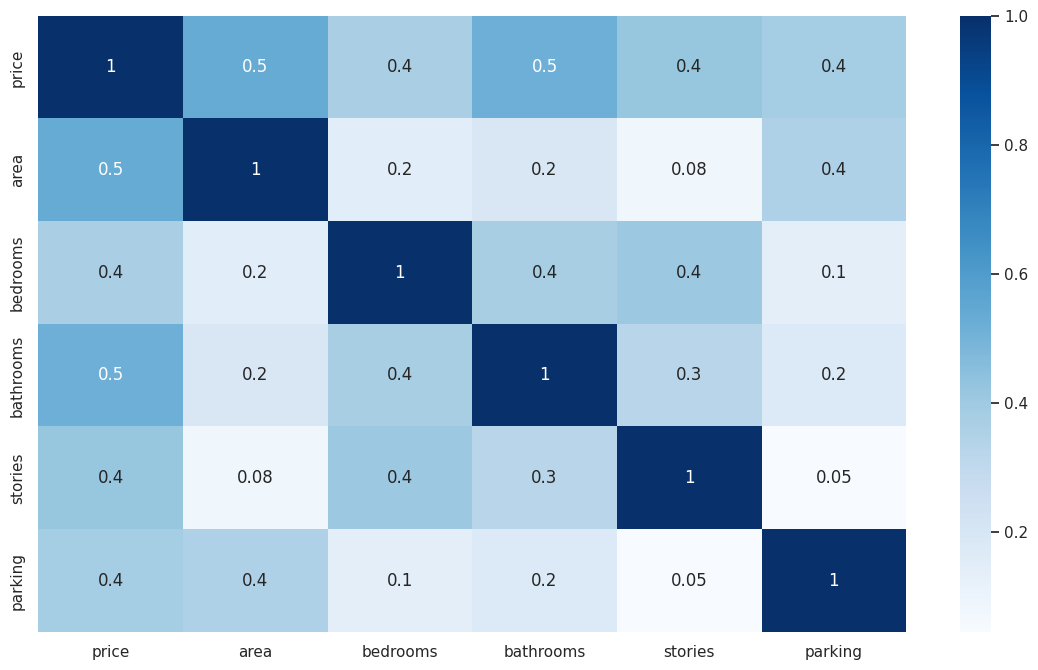

In [57]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

<Axes: xlabel='mainroad', ylabel='price'>

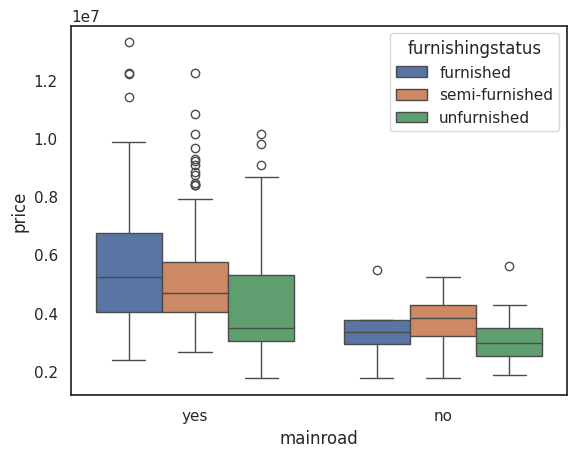

In [58]:
sns.boxplot(x = 'mainroad', y = 'price', hue = 'furnishingstatus', data = df)

In [65]:
def ch(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [66]:
df = ch('mainroad',df)
df = ch('guestroom',df)
df = ch('hotwaterheating',df)
df = ch('basement',df)
df = ch('airconditioning',df)
df = ch('prefarea',df)
df = ch('furnishingstatus',df)

In [67]:
df

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,1,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(436, 13)  <class 'pandas.core.frame.DataFrame'>
(436,) 	  <class 'pandas.core.series.Series'>
(109, 13)  <class 'pandas.core.frame.DataFrame'>
(109,) 	  <class 'pandas.core.series.Series'>


In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 4958211.22744316  4992433.87923777  6088725.96351585  4392752.71402717
  3600774.40129348  4644422.60786682  4839662.28976921  3011792.56859278
  3213715.04297896  3024917.66858071  4494261.6258568   2618200.99280364
  4483761.29259951  6367468.67130901  5026248.24182038  3104403.63405506
  6194925.57629061  4360279.09586635  7747036.1210344   5636467.13681207
  2797777.94057811  2984544.571076    3684862.00984649  3041464.44302526
  2873601.81525838  7957629.9262454   4223100.76375393  3770814.4402016
  4674984.61618229  3724475.62654836  6482261.12391157  3906804.40191983
  5160419.58637166  2775625.3243319   2880282.04649507  3550627.21080869
  3686223.18648859  4157322.48361772  2536096.09866801  4777824.14925714
  5162608.43111756  3800069.11791725  2306712.40457007  3319653.3719006
  6681270.67984403  4550380.16347878  2809490.16265543  6785236.16120136
  3873110.9693482   4323841.86247681  4725063.24795065  5649363.0546073
  3011037.30373645  2517772.08379197  7308824.47968079

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_test_s = scaler.transform(X_test)
print(x_test_s)

[[-0.38306464  0.04727831 -0.57018671 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [-0.71514512  0.04727831 -0.57018671 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [ 2.00606988  0.04727831 -0.57018671 ...  1.80494113 -0.84488844
   1.43589615]
 ...
 [-0.23547332  1.40341936 -0.57018671 ... -0.55403469  1.18358821
  -0.6964292 ]
 [ 0.3917898   0.04727831 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]
 [ 0.95955516  0.04727831 -0.57018671 ...  1.80494113  1.18358821
  -0.6964292 ]]


In [75]:
result = lin_reg.predict(x_test_s)
print(result)

[  507179.35165105  1937983.02680805   -47202.87821682   199933.76716426
 -3226001.2225079  -1965404.27518663   249207.64636115 -2419207.79848285
 -2193868.73027423 -1923575.04525686  -689275.06873233 -3026480.64202011
  -646295.28124435  5224936.82621273  2445177.90957191 -2550631.43441475
  1737155.58149026 -2405214.43326661  6762248.67928842  1351089.39026957
 -2977330.06274821 -2977243.92170473 -2349266.6057626  -3652816.39460608
 -3604388.14094617  2631155.73375037   596896.40779579 -1445823.65686435
   110007.8330644  -2705960.62227367  4331643.91347343  -750861.10106388
   862900.63652832 -3070766.6208928  -3390728.13138998 -2443316.12238564
 -3225961.81157297 -2121244.11615955 -3403446.69833782   954640.78529836
   511234.24670071 -1601425.34318763 -4114071.32372823 -3282390.22727775
  1777993.32080505   478063.89054009 -3558935.78198988  4169538.14581022
 -1033928.18496921   383285.94341493  1043399.29382409  4444457.46337595
 -2349577.38913518 -3226500.72795744  3673071.16451

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

1191244089727.7493


In [80]:
import pickle
from google.colab import files
pickle.dump(lin_reg, open('ml_6610412006.sav', 'wb'))
files.download('ml_6610412006.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>